In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("C:/Users/Acer/JUPYTER/Assignments/16.neural Networks/forestfires.csv")


In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
import matplotlib.pyplot as plt

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x=LabelEncoder()
x=x.apply(LabelEncoder().fit_transform)
x


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,0,1,0,0,0,0
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y = pd.DataFrame(y)

label_encoder_y = LabelEncoder()
y = y.apply(LabelEncoder().fit_transform)
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [11]:
seed = 7
np.random.seed(seed)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=30,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
history= model.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)


Epoch 1/150
35/35 [==============================] - 0s 6ms/step - loss: 0.6496 - accuracy: 0.7139 - val_loss: 0.5939 - val_accuracy: 0.6959
Epoch 2/150
35/35 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8324 - val_loss: 0.4463 - val_accuracy: 0.7076
Epoch 3/150
35/35 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9422 - val_loss: 0.2090 - val_accuracy: 0.9240
Epoch 4/150
35/35 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9711 - val_loss: 0.1664 - val_accuracy: 0.9240
Epoch 5/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9711 - val_loss: 0.1553 - val_accuracy: 0.9298
Epoch 6/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9798 - val_loss: 0.1269 - val_accuracy: 0.9474
Epoch 7/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9798 - val_loss: 0.1193 - val_accuracy: 0.9415
Epoch 8/150
3

Epoch 59/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9913 - val_loss: 0.1846 - val_accuracy: 0.9357
Epoch 60/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9884 - val_loss: 0.2044 - val_accuracy: 0.9357
Epoch 61/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9855 - val_loss: 0.1724 - val_accuracy: 0.9298
Epoch 62/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9827 - val_loss: 0.1711 - val_accuracy: 0.9298
Epoch 63/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.2124 - val_accuracy: 0.9357
Epoch 64/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9884 - val_loss: 0.2127 - val_accuracy: 0.9415
Epoch 65/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9942 - val_loss: 0.1764 - val_accuracy: 0.9357
Epoch 

Epoch 116/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9913 - val_loss: 0.2785 - val_accuracy: 0.9357
Epoch 117/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.2688 - val_accuracy: 0.9474
Epoch 118/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9913 - val_loss: 0.2890 - val_accuracy: 0.9298
Epoch 119/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.2857 - val_accuracy: 0.9357
Epoch 120/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9942 - val_loss: 0.2951 - val_accuracy: 0.9357
Epoch 121/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9913 - val_loss: 0.2622 - val_accuracy: 0.9474
Epoch 122/150
35/35 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.3136 - val_accuracy: 0.9298

In [15]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 939us/step - loss: 0.0990 - accuracy: 0.9768
accuracy: 97.68%


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

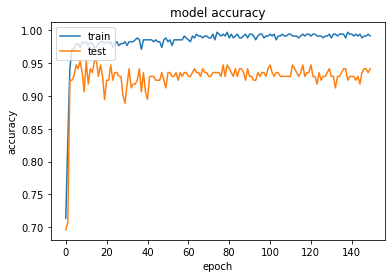

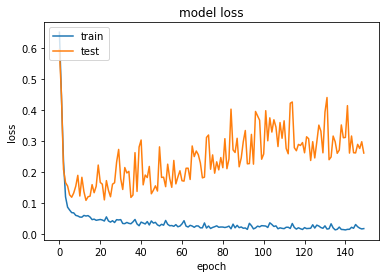

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [18]:
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [19]:
pd.DataFrame(X_standardized).describe()



,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-4.874674e-17,5.110891e-17,-9.019220e-17,2.594099e-16,6.442300e-17,-8.718579e-17,-7.816657e-17,6.485249e-17,4.724353e-18,-4.790924e-16,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959e+00,-1.423121e+00,-2.755520e+00,-2.134531e+00,-2.119754e+00,-2.133725e+00,-2.036890e+00,-1.713964e+00,-2.004018e+00,-1.100649e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-1.089076e+00,-9.031536e-01,-5.025653e-01,-8.010724e-01,-7.605602e-01,-6.928003e-01,-7.181571e-01,-7.060079e-01,-7.499909e-01,-1.100649e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,5.533922e-02,1.367805e-01,1.039993e-01,1.234588e-01,1.959092e-01,-4.438437e-02,4.755898e-02,-1.390326e-01,2.425585e-03,-1.100649e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,1.199754e+00,6.567476e-01,6.672378e-01,8.168572e-01,7.999952e-01,6.400547e-01,7.494654e-01,5.539372e-01,5.040366e-01,-1.100649e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.199754e+00,1.696682e+00,1.793715e+00,1.670271e+00,1.538322e+00,2.117002e+00,2.025659e+00,2.947833e+00,3.012092e+00,1.354679e+01,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


In [20]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))\
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn = create_model,verbose = 0)

batch_size = [10,20,40]
epochs = [10,50,100]

param_grid = dict(batch_size = batch_size,epochs = epochs)

grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.8s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.8s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   0.7s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

[CV 2/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.9s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.9s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
[CV 4/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.1s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END ..................batch_size=40, epochs=50; total time=   0.9s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
[CV 1/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.4s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................
[CV 2/5; 9/9] END .................batch_size=40, epochs=100; total time=   1.4s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END ..........

In [21]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9632001399993897, using {'batch_size': 10, 'epochs': 100}
0.9497012615203857,0.033033778691128474 with: {'batch_size': 10, 'epochs': 10}
0.963181471824646,0.02247139442935497 with: {'batch_size': 10, 'epochs': 50}
0.9632001399993897,0.028367618155457547 with: {'batch_size': 10, 'epochs': 100}
0.9515496611595153,0.033067295514883334 with: {'batch_size': 20, 'epochs': 10}
0.9515870094299317,0.032414512541437485 with: {'batch_size': 20, 'epochs': 50}
0.9496265769004821,0.04043089033396464 with: {'batch_size': 20, 'epochs': 100}
0.9301344275474548,0.05474906613067302 with: {'batch_size': 40, 'epochs': 10}
0.9554518342018128,0.025701995489028635 with: {'batch_size': 40, 'epochs': 50}
0.9573375582695007,0.03561439080600198 with: {'batch_size': 40, 'epochs': 100}


In [22]:
from keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [23]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)



learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]



param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)



grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.8s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.5s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   0.5s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END ......dropout_rate=0.0, learnin

[CV 4/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   0.6s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 5/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   0.8s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 1/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   0.7s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 2/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   0.7s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 3/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   0.6s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 4/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   0.6s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................
[CV 5/5; 3/9] END .......dro

[CV 3/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   0.5s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 4/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   0.6s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................
[CV 5/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   0.8s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................
[CV 1/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   0.5s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................
[CV 2/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   0.5s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................
[CV 3/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   0.5s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................
[CV 4/5; 5/9] END ......drop

[CV 2/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   0.6s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................
[CV 3/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   0.5s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................
[CV 4/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   0.7s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................
[CV 5/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   0.5s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................
[CV 1/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   0.5s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................
[CV 2/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   0.5s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................
[CV 3/5; 7/9] END .....dropo

[CV 1/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.5s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................
[CV 2/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.7s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................
[CV 3/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.5s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................
[CV 4/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.5s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................
[CV 5/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   0.5s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 1/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   0.5s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 2/5; 9/9] END .......dro

[CV 5/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   0.6s


In [24]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9651419043540954, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9651419043540954,0.017937392809299936 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9457057356834412,0.03344213204510345 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9612210631370545,0.023804576187477514 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9457991123199463,0.042678160644805355 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7422330141067505,0.15224774392940219 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9554144859313964,0.030469758867435616 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9399178504943848,0.037052728811895724 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [25]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [26]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']


param_grids = dict(activation_function = activation_function,init = init)



grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   1.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.6s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.6s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   0.6s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END .activation_function=softmax,

[CV 4/5; 2/12] END .activation_function=softmax, init=normal; total time=   0.6s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................
[CV 5/5; 2/12] END .activation_function=softmax, init=normal; total time=   0.6s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 1/5; 3/12] END ...activation_function=softmax, init=zero; total time=   0.9s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 2/5; 3/12] END ...activation_function=softmax, init=zero; total time=   0.6s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 3/5; 3/12] END ...activation_function=softmax, init=zero; total time=   0.6s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 4/5; 3/12] END ...activation_function=softmax, init=zero; total time=   0.6s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 5/5; 3/12] END ...activa

[CV 3/5; 4/12] END ...activation_function=relu, init=uniform; total time=   0.5s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................
[CV 4/5; 4/12] END ...activation_function=relu, init=uniform; total time=   0.5s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................
[CV 5/5; 4/12] END ...activation_function=relu, init=uniform; total time=   0.7s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................
[CV 1/5; 5/12] END ....activation_function=relu, init=normal; total time=   0.5s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................
[CV 2/5; 5/12] END ....activation_function=relu, init=normal; total time=   0.5s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................
[CV 3/5; 5/12] END ....activation_function=relu, init=normal; total time=   0.5s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................
[CV 4/5; 5/12] END ....activ

[CV 2/5; 6/12] END ......activation_function=relu, init=zero; total time=   0.5s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................
[CV 3/5; 6/12] END ......activation_function=relu, init=zero; total time=   0.6s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................
[CV 4/5; 6/12] END ......activation_function=relu, init=zero; total time=   0.6s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................
[CV 5/5; 6/12] END ......activation_function=relu, init=zero; total time=   0.8s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 1/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   0.6s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 2/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   0.5s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 3/5; 7/12] END ...activa

[CV 1/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.5s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................
[CV 2/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.5s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................
[CV 3/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.6s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................
[CV 4/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.5s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................
[CV 5/5; 8/12] END ....activation_function=tanh, init=normal; total time=   0.6s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................
[CV 1/5; 9/12] END ......activation_function=tanh, init=zero; total time=   0.8s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................
[CV 2/5; 9/12] END ......act

[CV 5/5; 9/12] END ......activation_function=tanh, init=zero; total time=   0.5s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................
[CV 1/5; 10/12] END activation_function=linear, init=uniform; total time=   0.5s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................
[CV 2/5; 10/12] END activation_function=linear, init=uniform; total time=   0.5s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................
[CV 3/5; 10/12] END activation_function=linear, init=uniform; total time=   0.6s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform; total time=   0.5s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform; total time=   0.5s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END .activat

[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=   0.5s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................
[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=   0.5s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................
[CV 1/5; 12/12] END ...activation_function=linear, init=zero; total time=   0.5s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................
[CV 2/5; 12/12] END ...activation_function=linear, init=zero; total time=   0.5s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................
[CV 3/5; 12/12] END ...activation_function=linear, init=zero; total time=   0.7s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................
[CV 4/5; 12/12] END ...activation_function=linear, init=zero; total time=   0.5s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................
[CV 5/5; 12/12] END ...activ

In [27]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8528005957603455, using {'activation_function': 'linear', 'init': 'normal'}
0.45679611563682554,0.27491504178962517 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.5781553447246551,0.2565036801559647 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.8431105375289917,0.07440463166515537 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8353062033653259,0.0841133033399654 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8373039603233338,0.0762203097794053 with: {'activatio

In [28]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 30,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [29]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)



neuron1 = [4,8,16]
neuron2 = [2,4,8]



param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)



grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.8s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.5s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.6s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.6s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ......................neuron1=4

[CV 4/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   0.6s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 5/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   0.5s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 1/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   0.6s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 2/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   0.7s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 3/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   0.6s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 4/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   1.0s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 5/5; 3/9] END ..........

[CV 3/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   0.7s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................
[CV 4/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   0.6s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................
[CV 5/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   0.6s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 1/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   0.7s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 2/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   0.6s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 3/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   0.6s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 4/5; 5/9] END ..........

[CV 2/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.7s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................
[CV 3/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.5s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................
[CV 4/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.6s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................
[CV 5/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.6s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 1/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.4s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 2/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   0.5s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 3/5; 7/9] END ..........

[CV 1/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.5s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................
[CV 2/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.5s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................
[CV 3/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.8s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................
[CV 4/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.5s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................
[CV 5/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   0.5s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 1/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   0.5s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 2/5; 9/9] END ..........

[CV 5/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   0.5s


In [30]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9090365886688232, using {'neuron1': 16, 'neuron2': 8}
0.7519604206085205,0.1309436533381026 with: {'neuron1': 4, 'neuron2': 2}
0.7829910278320312,0.12280661662742134 with: {'neuron1': 4, 'neuron2': 4}
0.7985250115394592,0.10974113197889353 with: {'neuron1': 4, 'neuron2': 8}
0.8412061214447022,0.07443854303819633 with: {'neuron1': 8, 'neuron2': 2}
0.8256721496582031,0.08449054101873715 with: {'neuron1': 8, 'neuron2': 4}
0.858625841140747,0.07877283176276022 with: {'neuron1': 8, 'neuron2': 8}
0.879966390132904,0.06432787394389779 with: {'neuron1': 16, 'neuron2': 2}
0.8780059814453125,0.06965364062854597 with: {'neuron1': 16, 'neuron2': 4}
0.9090365886688232,0.05231706577257518 with: {'neuron1': 16, 'neuron2': 8}


In [31]:
from sklearn.metrics import classification_report, accuracy_score

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 30,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 30,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [32]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y,y_predict))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9748549323017408
